In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel
# import matplotlib_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import lightkurve as lk

# plt.rcParams['figure.dpi'] = 300
# plt.rcParams['savefig.dpi'] = 300
# plt.rcParams['figure.figsize'] = (15,12)
%matplotlib inline

In [2]:
# plt.rcParams['figure.dpi'] = 300
# plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = (9,6)

In [3]:
# matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [4]:
def calc_lomb_scargle(t,y):
   oversample = 10
   tmax = t.max()
   tmin = t.min()
   df = 1.0 / (tmax - tmin)
   fmin = df
   fmax = 600 # maximum frequency in cycles per day (c/d)
 
   freq = np.arange(fmin, fmax, df / oversample)
   model = LombScargle(t, y)
   sc = model.power(freq, method="fast", normalization="psd")
 
   fct = np.sqrt(4./len(t))
   amp = np.sqrt(sc) * fct
   return freq*11.574, amp*1E6 # return frequency in muHz and amplitude in ppm

In [ ]:
df = pd.read_csv('../anonymous1675817222603/EP')

In [5]:
# searching for Z Umi, RA= 225.5057, DEC= 83.0635
# search_result = lk.search_lightcurve('Z Umi', mission='TESS')
# search_result = lk.search_lightcurve('05:10:28.53 -69:47:04.50', mission='TESS')
search_result = lk.search_lightcurve('KIC 8569885')#, mission='TESS')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr008569885,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr008569885,0.0
2,Kepler Quarter 02,2009,Kepler,1800,kplr008569885,0.0
3,Kepler Quarter 03,2009,Kepler,1800,kplr008569885,0.0
4,Kepler Quarter 04,2010,Kepler,1800,kplr008569885,0.0
5,Kepler Quarter 05,2010,Kepler,1800,kplr008569885,0.0
6,Kepler Quarter 06,2010,Kepler,1800,kplr008569885,0.0
7,Kepler Quarter 07,2010,Kepler,1800,kplr008569885,0.0
8,Kepler Quarter 08,2011,Kepler,1800,kplr008569885,0.0


In [6]:
lc = search_result.download_all()
# lc_single = search_result[0].download(quality_bitmask='none')
# lc

In [7]:
lc

LightCurveCollection of 18 objects:
    0: <KeplerLightCurve LABEL="KIC 8569885" QUARTER=0 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    1: <KeplerLightCurve LABEL="KIC 8569885" QUARTER=1 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    2: <KeplerLightCurve LABEL="KIC 8569885" QUARTER=2 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    3: <KeplerLightCurve LABEL="KIC 8569885" QUARTER=3 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    4: <KeplerLightCurve LABEL="KIC 8569885" QUARTER=4 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    5: <KeplerLightCurve LABEL="KIC 8569885" QUARTER=5 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    6: <KeplerLightCurve LABEL="KIC 8569885" QUARTER=6 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    7: <KeplerLightCurve LABEL="KIC 8569885" QUARTER=7 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    8: <KeplerLightCurve LABEL="KIC 8569885" QUARTER=8 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    9: <KeplerLightCurve LABEL="KIC 8569885" QUARTER=9 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    10: <KeplerLightCurv

In [ ]:
lc_single = search_result[0].download(quality_bitmask='none')

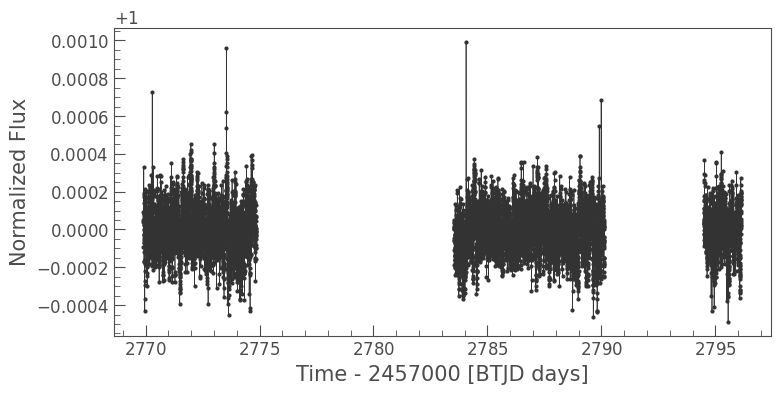

In [88]:
# fig, ax = plt.subplots(figsize=(15,5))
# lc.plot(ax=ax,normalize=True);
# ax = lc_single.plot(normalize=True);
ax = lc_single.plot(marker='o',normalize=True);
# ax.set_xlim(2000,2400)
# ax.set_ylim(0.6,1.2)
ax.get_legend().remove()
# plt.plot(lc_single.time.value,lc_single.flux.value,marker='o',markersize=2,linewidth=1)
plt.show()

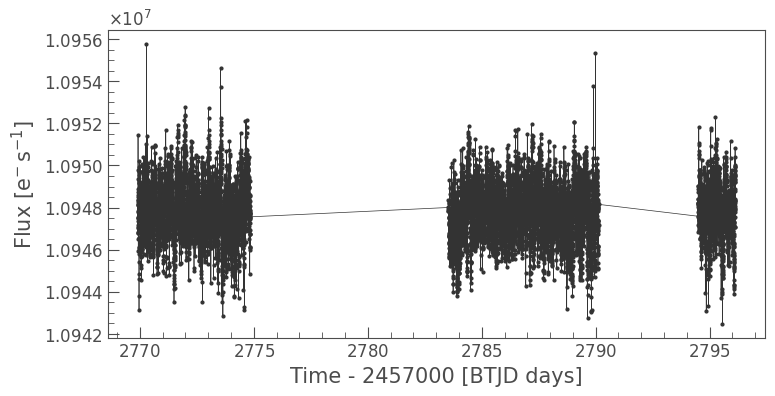

In [89]:
lc_single = lc_single.remove_outliers(sigma=7)
ax = lc_single.plot(marker='o');
ax.get_legend().remove()
plt.show()

In [375]:
# pg = lc_single.to_periodogram()
# ax = pg.plot();
# ax.set_xlim(0,1)

In [10]:
freq,amp = calc_lomb_scargle(lc_single.time.value,lc_single.flux.value)
# lc_single.flux.value

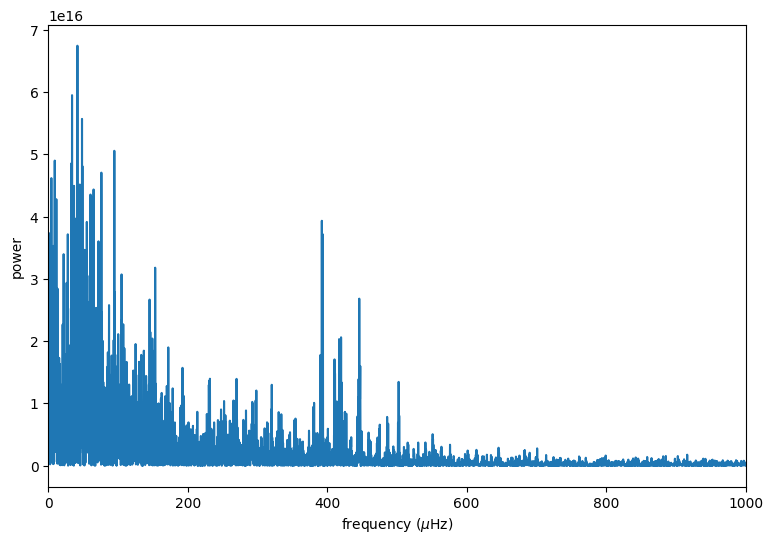

In [14]:
# amp = convolve(amp,Gaussian1DKernel(3))

plt.plot(freq,amp**2)
plt.xlim(0,10)
plt.xlim(0,1000)
# plt.axvline(0.03,color='k')
plt.xlabel(r'frequency ($\mu$Hz)')
plt.ylabel('power')
plt.show()

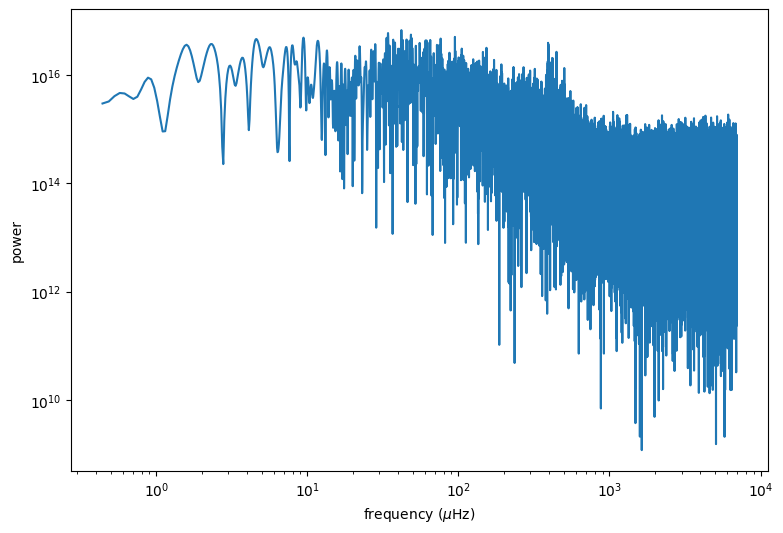

In [12]:
plt.plot(freq,amp**2)
plt.xscale('log')
plt.yscale('log')
# plt.xlim(0,5)
plt.xlabel(r'frequency ($\mu$Hz)')
plt.ylabel('power')
plt.show()

In [1095]:
# echelle.interact_echelle(freq, amp**2, 7, 15,fmax=50, scale='sqrt', backend='bokeh',
#                          smooth=True, smooth_filter_width=10.0)

In [689]:
# lc_0 = search_result[0].download()
# lc_1 = search_result[1].download()

In [690]:
# lc_0 = lc_0.remove_nans()
# lc_1 = lc_1.remove_nans()
# # lc_0.remove_outliers()
# # lc_1.remove_outliers()
# lc_stitched_time = np.concatenate((lc_0.time.value,lc_1.time.value))
# lc_stitched_flux = np.concatenate((lc_0.flux.value,lc_1.flux.value))

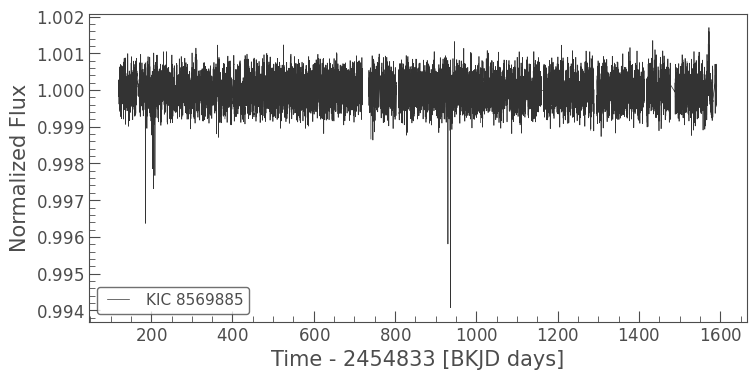

In [8]:
lc_stitched = lc.stitch()
lc_stitched.remove_nans()
# lc_stitched = lc[-10:-2].stitch()
lc_stitched.plot();

# plt.plot(lc_stitched_time,lc_stitched_flux,marker='o',markersize=2,linewidth=1)
# # plt.axvline(1652.84,color='k')
# plt.xlabel('time')
# plt.ylabel('flux (normalized)')
# plt.show()

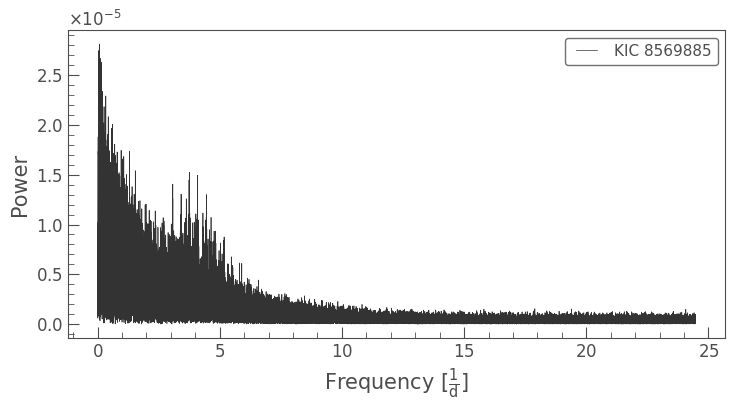

In [12]:
pg = lc_stitched.to_periodogram()
pg.plot();

In [9]:
freq,amp = calc_lomb_scargle(lc_stitched.time.value,lc_stitched.flux.value)
amp

array([nan, nan, nan, ..., nan, nan, nan])

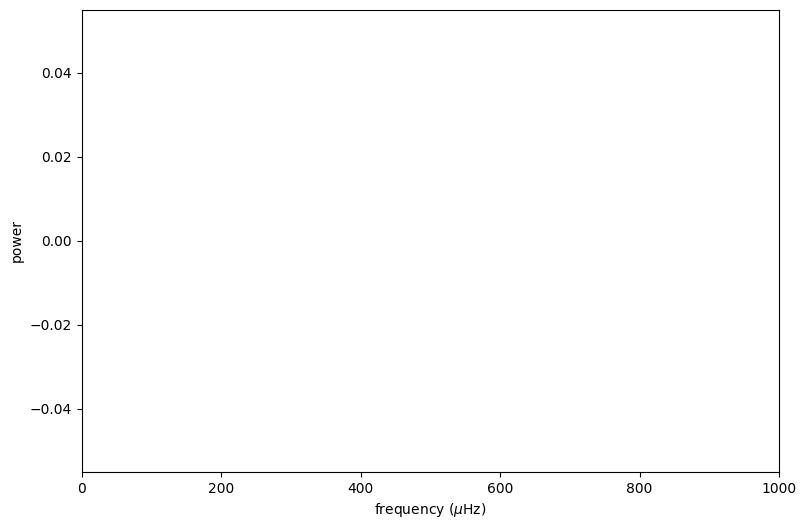

In [10]:
plt.plot(freq,amp**2)
plt.xlim(0,10)
plt.xlim(0,1000)
# plt.axvline(0.03,color='k')
plt.xlabel(r'frequency ($\mu$Hz)')
plt.ylabel('power')
plt.show()

In [692]:
# freq,amp = calc_lomb_scargle(lc_stitched_time,lc_stitched_flux)
# amp

In [693]:
# amp = convolve(amp,Gaussian1DKernel(3))

# plt.plot(freq,amp**2)
# plt.xlim(0,50)
# # plt.axvline(0.03,color='k')
# plt.xlabel(r'frequency ($\mu$Hz)')
# plt.ylabel('power')
# plt.show()

In [694]:
# plt.plot(freq,amp**2)
# plt.xscale('log')
# plt.yscale('log')
# # plt.xlim(0,5)
# plt.xlabel(r'frequency ($\mu$Hz)')
# plt.ylabel('power')
# plt.show()

In [5]:
from astropy.io import fits

In [ ]:
tpf_lightcurve = fits.open('../tess2022190063128-s0054-0000000375621179-0227-s_tp.fits')

In [12]:
searching = lk.search_lightcurve('TIC 125646745',author='SPOC')#, mission='TESS')
searching

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 07,2019,SPOC,120,125646745,0.0


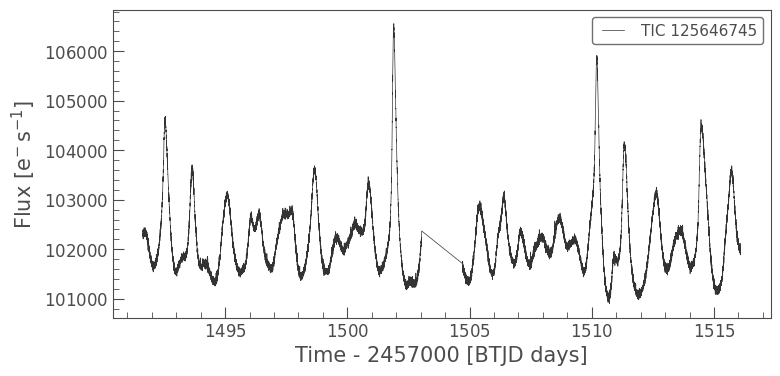

In [9]:
lc_single = searching[0].download()
lc_single.plot();

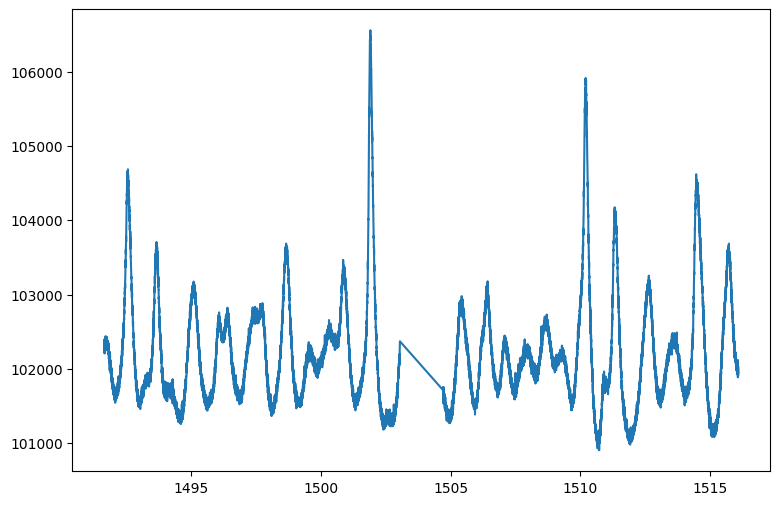

In [11]:
plt.plot(lc_single.time.value,lc_single.flux.value)

In [41]:
sigmadra = fits.open('../tess2022190063128-s0054-0000000375621179-0227-s_tp.fits')

In [42]:
sigmadra[1].data.columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '869J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(11,79)'
    name = 'FLUX'; format = '869E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,79)'
    name = 'FLUX_ERR'; format = '869E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,79)'
    name = 'FLUX_BKG'; format = '869E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,79)'
    name = 'FLUX_BKG_ERR'; format = '869E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,79)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
)

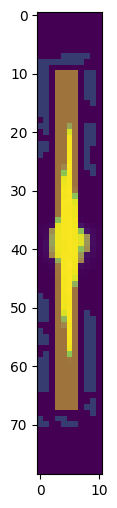

In [44]:
plt.imshow(sigmadra[1].data['FLUX'][10000])
plt.imshow(sigmadra[2].data,alpha=0.5)
plt.show()

In [90]:
def create_lc(tpf,threshold=3,plot_mask=False):

    mask = tpf.create_threshold_mask(threshold=threshold)
    
#     if plot_mask:
#         tpf.plot(scale='log',aperture_mask=mask);
#         plt.show()
    
    lc = tpf.to_lightcurve(aperture_mask = mask)
    
    background_mask = ~tpf.create_threshold_mask(threshold=0.001, reference_pixel=None)
    n_background_pixels = background_mask.sum()
    background_lc_per_pixel = tpf.to_lightcurve(aperture_mask=background_mask) / n_background_pixels
    
    n_target_pixels = mask.sum()
    background_estimate_lc = background_lc_per_pixel * n_target_pixels
    
    if plot_mask:
        tpf.plot(scale='log',aperture_mask=mask);
        tpf.plot(scale='log',aperture_mask=background_mask)
        plt.show()
#     if plot_mask:
#         tpf.plot(scale='log',aperture_mask=mask,frame=5449);
#         tpf.plot(scale='log',aperture_mask=background_mask,frame=5449)
#         plt.show()
    
    corrected_lc = lc - background_estimate_lc.flux
    
    return corrected_lc

In [16]:
search_ffi = lk.search_targetpixelfile('beta Aql')
# search_tpf = lk.search_targetpixelfile('W Men')
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 54,2022,SPOC,120,375621179,0.0


In [17]:
ffi_data = search_ffi[0].download(cutout_size=30)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightkurve/search.py:315: LightkurveWarning: `cutout_size` can only be specified for TESS Full Frame Image cutouts.
  warnings.warn(


<AxesSubplot:title={'center':'Target ID: 375621179, Cadence: 1110560'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

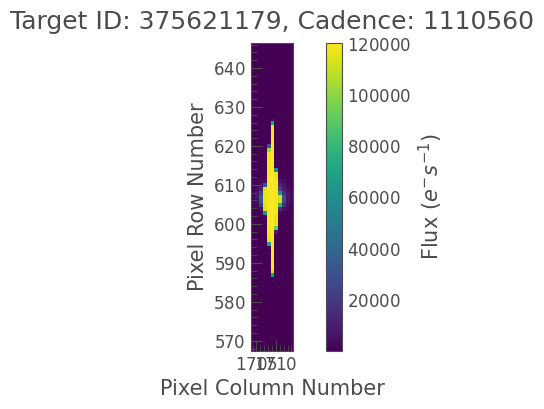

In [18]:
ffi_data.plot()

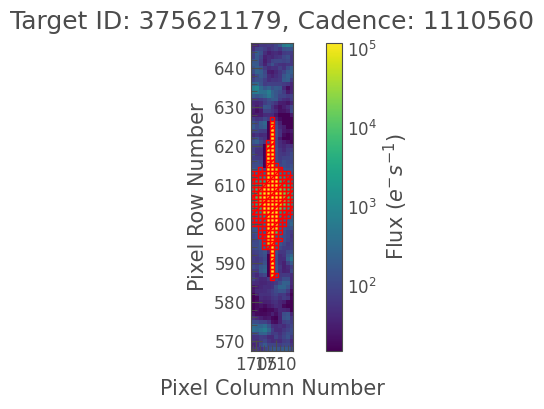

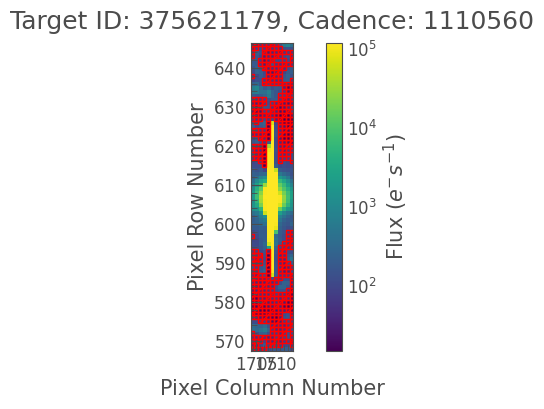

In [91]:
lc40 = create_lc(ffi_data, threshold=1, plot_mask=True)

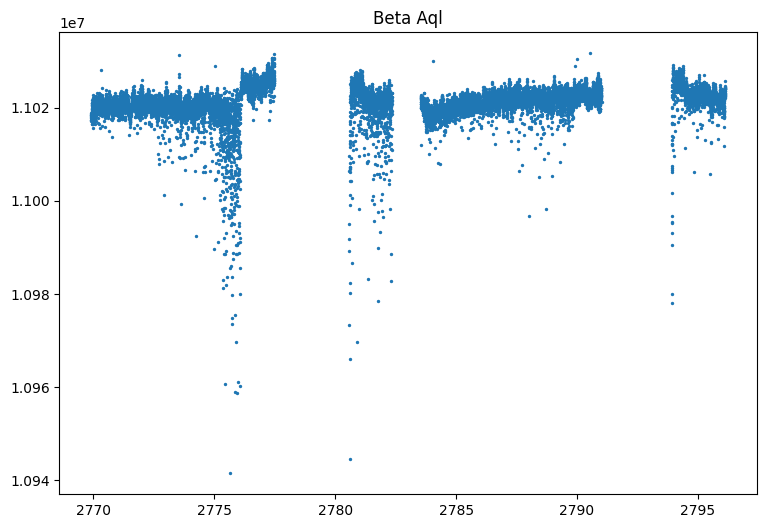

In [86]:
# plt.plot(lc40.time.value,lc40.flux.value,marker='o',markersize=1,linewidth=1)
plt.scatter(lc40.time.value,lc40.flux.value,s=2)
plt.title('Beta Aql')
plt.show()

In [76]:
np.argmin(lc40.flux.value)

5449

In [92]:
# ffi_data.plot(scale='log',aperture_mask=mask,frame=5449);
# ffi_data.plot(scale='log',aperture_mask=background_mask,frame=5449)
# plt.show()

In [36]:
np.shape(ffi_data)

(17899, 79, 11)

In [70]:
np.ones(np.shape(sigmadra[1].data['FLUX'][50000]))

(39, 11)

In [93]:
fulltpf = ffi_data.to_lightcurve(aperture_mask = np.ones(np.shape(sigmadra[1].data['FLUX'][10000])))

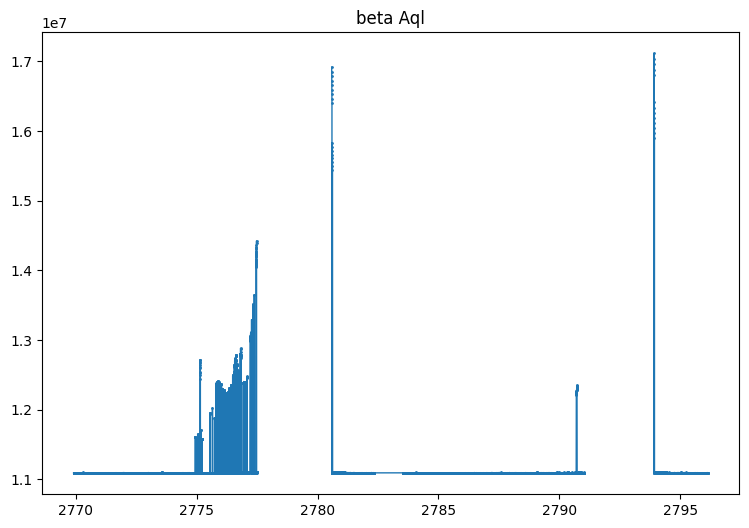

In [94]:
plt.plot(fulltpf.time.value,fulltpf.flux.value,marker='o',markersize=1,linewidth=1)
plt.title('beta Aql')
plt.show()

In [96]:
import pandas as pd

In [99]:
temp = np.concatenate(([fulltpf.time.value],[fulltpf.flux.value]))
frame = pd.DataFrame(temp.transpose(),columns=('Time','Flux'))
frame.to_csv('../betaaql_fullframeLC.csv',index=False)
frame

,Time,Flux
0,2769.904280,11091906.0
1,2769.905669,11092445.0
2,2769.907057,11092603.0
3,2769.908446,11090547.0
4,2769.909835,11091545.0
...,...,...
17894,2796.127987,11095456.0
17895,2796.129376,11096084.0
17896,2796.130765,11095601.0
17897,2796.132154,11096080.0


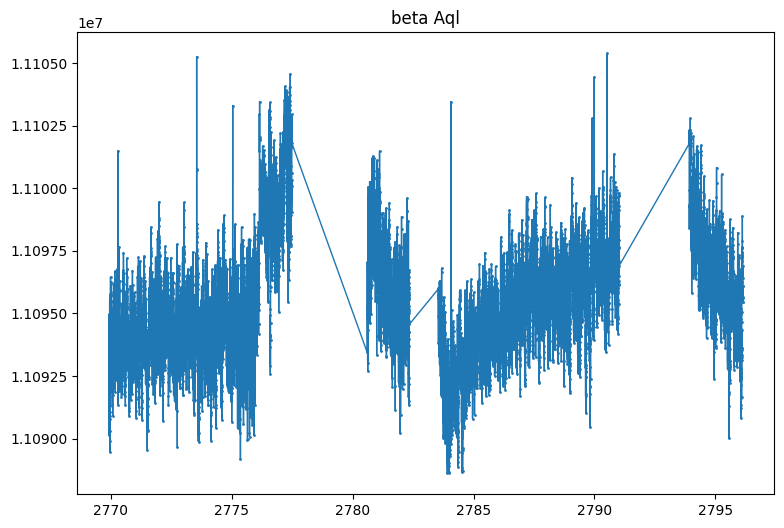

In [51]:
fulltpf = fulltpf.remove_outliers(sigma=5)
plt.plot(fulltpf.time.value,fulltpf.flux.value,marker='o',markersize=1,linewidth=1)
plt.title('beta Aql')
plt.show()

In [52]:
# fulltpf = fulltpf.remove_nans()
# fulltpf = fulltpf.remove_outliers(sigma=3)
freq,amp = calc_lomb_scargle(fulltpf.time.value,fulltpf.flux.value)

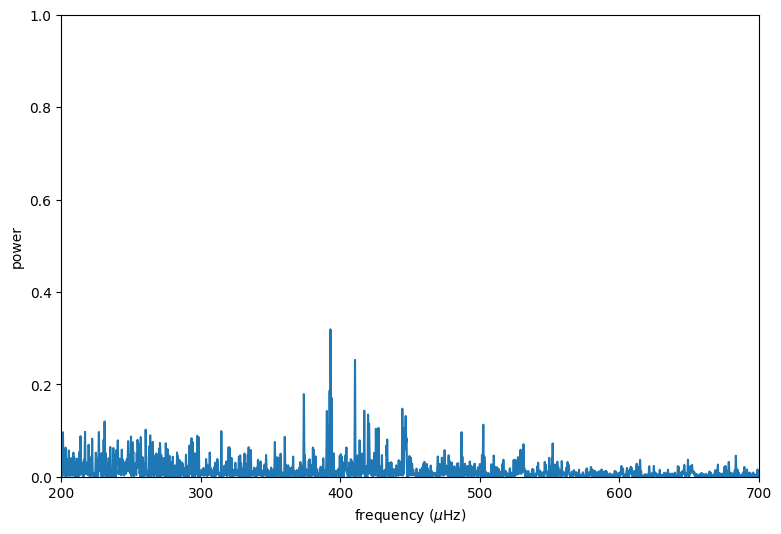

In [56]:
plt.plot(freq,amp**2/1e17)
# plt.xlim(0,6000)
plt.xlim(200,700)
plt.ylim(0,1)
# plt.axvline(0.03,color='k')
plt.xlabel(r'frequency ($\mu$Hz)')
plt.ylabel('power')
plt.show()

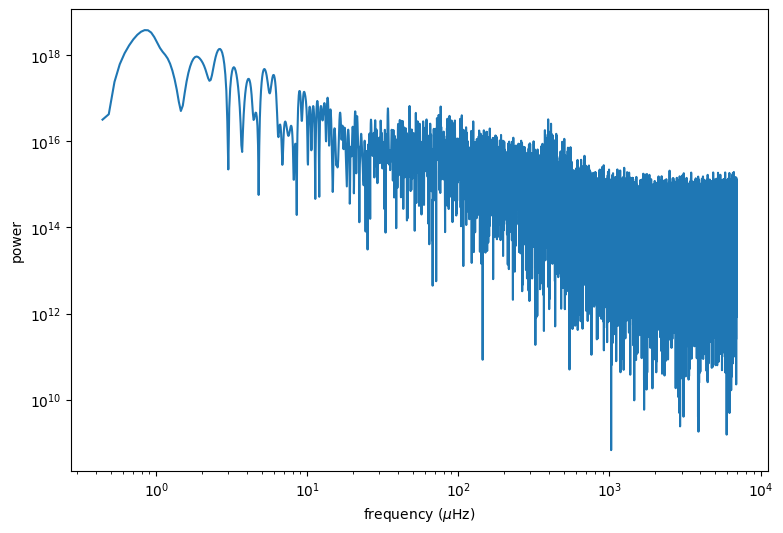

In [57]:
plt.plot(freq,amp**2)
plt.xscale('log')
plt.yscale('log')
# plt.xlim(0,5)
plt.xlabel(r'frequency ($\mu$Hz)')
plt.ylabel('power')
plt.show()

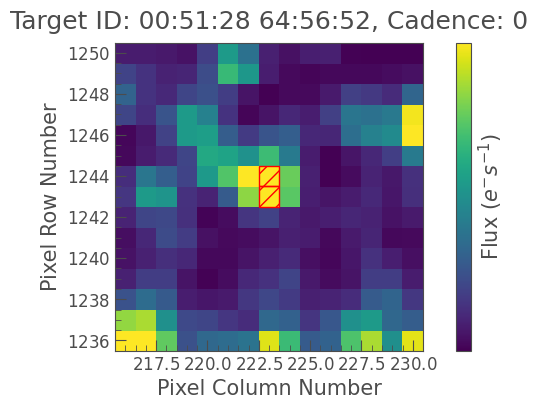

/var/folders/5_/9nz8zb3j1nd7ngnmb4btgpjh0000gq/T/ipykernel_9925/3706241321.py:14: RuntimeWarning: invalid value encountered in sqrt
  amp = np.sqrt(sc) * fct


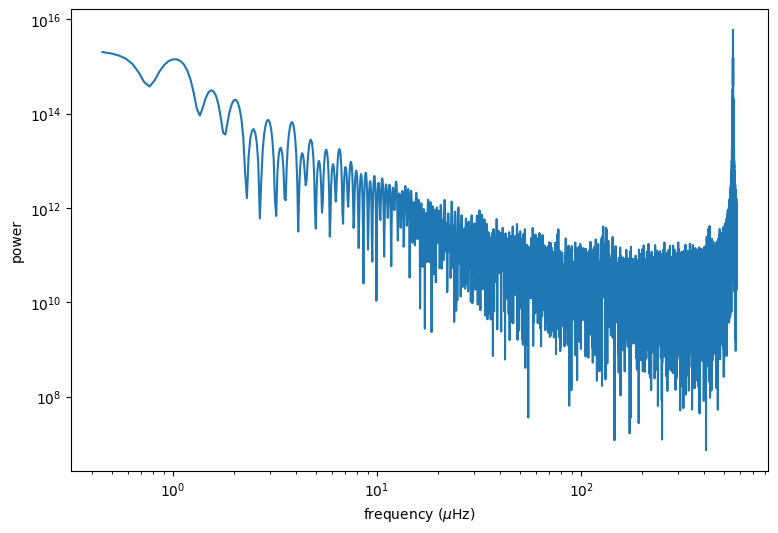

In [64]:
ffi_data = search_ffi[2].download(cutout_size=15)
lc41 = create_lc(ffi_data, threshold=10, plot_mask=True)
lc41 = lc41.remove_nans()
lc41 = lc41.remove_outliers(sigma=3)
freq,amp = calc_lomb_scargle(lc41.time.value,lc41.flux.value)


plt.plot(freq,amp**2)
plt.xscale('log')
plt.yscale('log')
# plt.xlim(0,5)
plt.xlabel(r'frequency ($\mu$Hz)')
plt.ylabel('power')
plt.show()

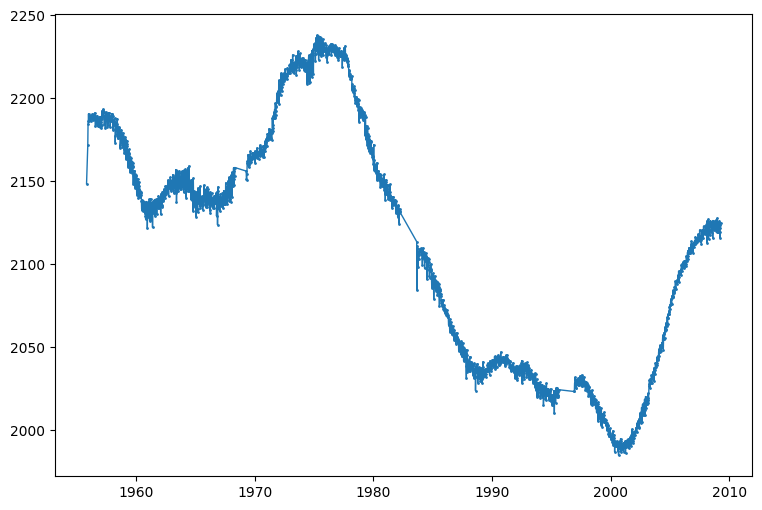

In [80]:
stitched_lc = lc40
stitched_lc = stitched_lc.append(lc41)


stitched_time = np.concatenate((lc40.time.value,lc41.time.value))
stitched_flux = np.concatenate((lc40.flux.value,lc41.flux.value+600))

# plt.plot(stitched_lc.time.value,stitched_lc.flux.value,marker='o',markersize=1,linewidth=1)
# plt.plot(lc41.time.value,lc41.flux.value+600,marker='o',markersize=1,linewidth=1)
plt.plot(stitched_time,stitched_flux,marker='o',markersize=1,linewidth=1)
plt.show()

/var/folders/5_/9nz8zb3j1nd7ngnmb4btgpjh0000gq/T/ipykernel_9925/3706241321.py:14: RuntimeWarning: invalid value encountered in sqrt
  amp = np.sqrt(sc) * fct


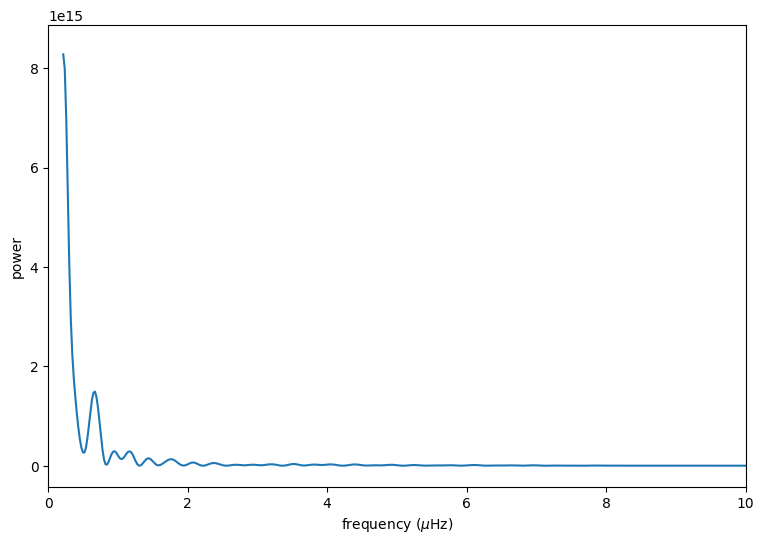

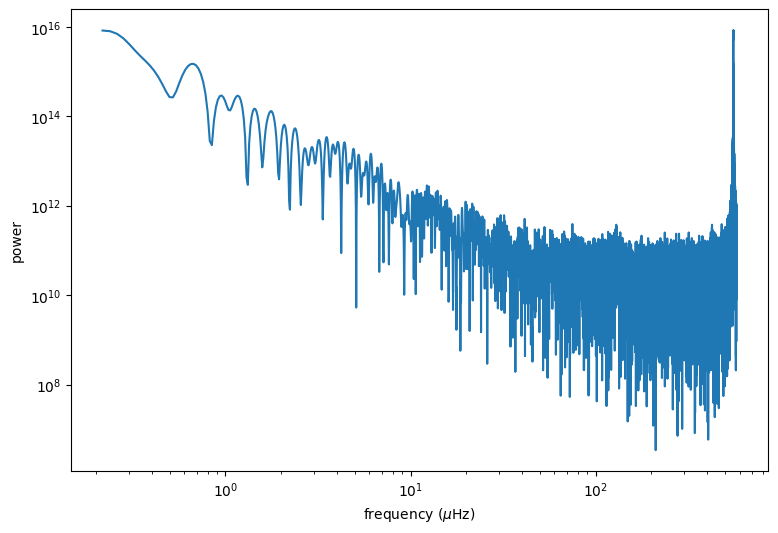

In [86]:
freq,amp = calc_lomb_scargle(stitched_time,stitched_flux)

plt.plot(freq,amp**2)
plt.xlim(0,10)
# plt.axvline(0.66,color='k')
plt.xlabel(r'frequency ($\mu$Hz)')
plt.ylabel('power')
plt.show()

plt.plot(freq,amp**2)
plt.xscale('log')
plt.yscale('log')
# plt.xlim(0,5)
plt.xlabel(r'frequency ($\mu$Hz)')
plt.ylabel('power')
plt.show()

In [33]:
target_mask = ffi_data.create_threshold_mask(threshold=40, reference_pixel='center')
n_target_pixels = target_mask.sum()
n_target_pixels

12

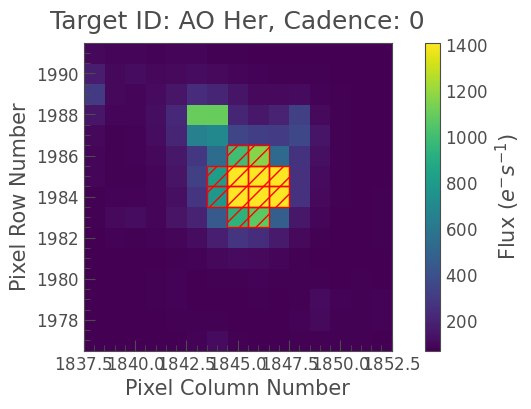

In [34]:
ffi_data.plot(aperture_mask=target_mask, mask_color='r');

In [35]:
ffi_lc = ffi_data.to_lightcurve(aperture_mask=target_mask)

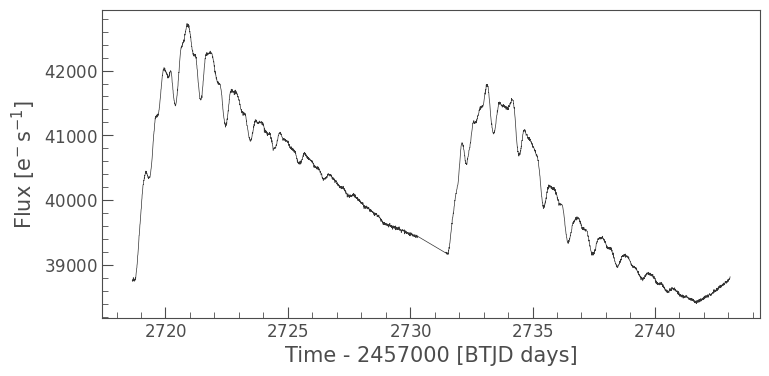

In [36]:
ffi_lc.plot()
plt.show()

In [37]:
ffi_data.interact()

In [132]:
# ffi_data.interact()

In [79]:
import astropy.io.fits as fits
# tmp = fits.open('tess-s0024-2-1_263.900960_50.411360_15x15_astrocut-custom-lc.fits')
# tmp.info()

Filename: tess-s0024-2-1_263.900960_50.411360_15x15_astrocut-custom-lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   ()      
  1  LIGHTCURVE    1 BinTableHDU     28   1224R x 7C   [D, E, E, J, D, D, J]   
  2  APERTURE      1 ImageHDU        10   (15, 15)   uint8   


In [108]:
from astropy.table import Table
data = Table.read('tess-s0024-2-1_263.900960_50.411360_15x15_astrocut-custom-lc.fits')
# print(data)

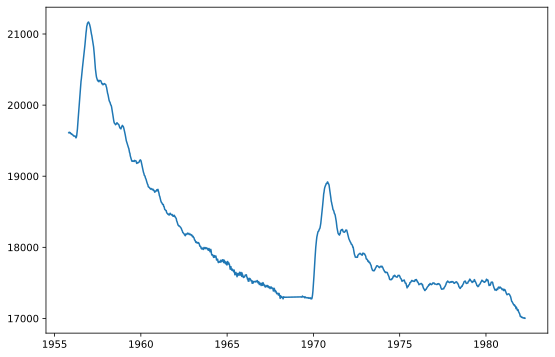

In [109]:
plt.plot(data['TIME'],data['FLUX'])
plt.show()

In [110]:
data_sky = Table.read('sky_tess.fits')

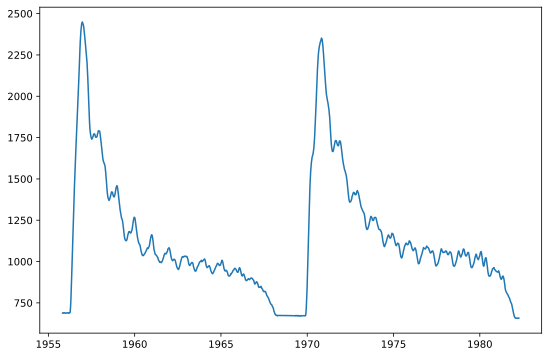

In [111]:
plt.plot(data_sky['TIME'],data_sky['FLUX'])
plt.show()

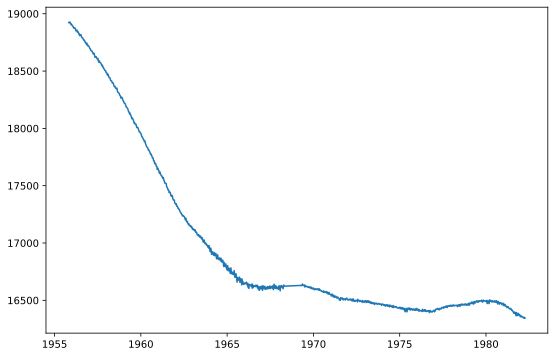

In [113]:
timeseries = data['TIME']
sky_subbed = data['FLUX']-data_sky['FLUX']

plt.plot(timeseries,sky_subbed)
plt.show()

In [114]:
from scipy import signal

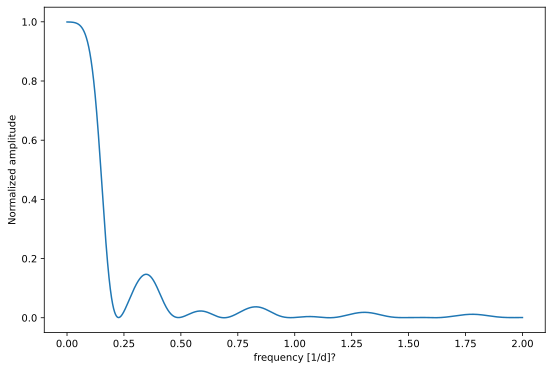

In [124]:
w = np.linspace(0.0001, 2, 10000)
pgram = signal.lombscargle(timeseries,sky_subbed, w, normalize=True)

plt.plot(w, pgram)
plt.xlabel('frequency [1/d]?')
plt.ylabel('Normalized amplitude')
plt.show()

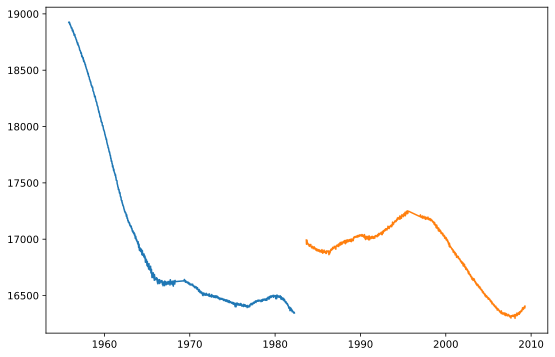

In [134]:
data1 = Table.read('star_tess_1.fits')
data_sky1 = Table.read('sky_tess_1.fits')

timeseries1 = data1['TIME']
sky_subbed1 = data1['FLUX']-data_sky1['FLUX']

plt.plot(timeseries,sky_subbed)
plt.plot(timeseries1,sky_subbed1)
plt.show()

# Classical

In [18]:
# beta dor, a delta cep
ceph = lk.search_lightcurve('83.40630968 −62.48977125', author="SPOC", mission='TESS')
ceph

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,149346418,0.0
1,TESS Sector 02,2018,SPOC,120,149346418,0.0
2,TESS Sector 03,2018,SPOC,120,149346418,0.0
3,TESS Sector 04,2018,SPOC,120,149346418,0.0
4,TESS Sector 05,2018,SPOC,120,149346418,0.0
5,TESS Sector 06,2018,SPOC,120,149346418,0.0
...,...,...,...,...,...,...
16,TESS Sector 32,2020,SPOC,120,149346418,0.0
17,TESS Sector 33,2020,SPOC,120,149346418,0.0


In [19]:
lc_cep = ceph.download_all()
lc_cep

LightCurveCollection of 23 objects:
    0: <TessLightCurve LABEL="TIC 149346418" SECTOR=1 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    1: <TessLightCurve LABEL="TIC 149346418" SECTOR=2 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    2: <TessLightCurve LABEL="TIC 149346418" SECTOR=3 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    3: <TessLightCurve LABEL="TIC 149346418" SECTOR=4 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    4: <TessLightCurve LABEL="TIC 149346418" SECTOR=5 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    5: <TessLightCurve LABEL="TIC 149346418" SECTOR=6 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    6: <TessLightCurve LABEL="TIC 149346418" SECTOR=7 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    7: <TessLightCurve LABEL="TIC 149346418" SECTOR=9 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    8: <TessLightCurve LABEL="TIC 149346418" SECTOR=10 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    9: <TessLightCurve LABEL="TIC 149346418" SECTOR=11 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    10: <TessLightCurve LABEL="TIC 149346418" SECTOR

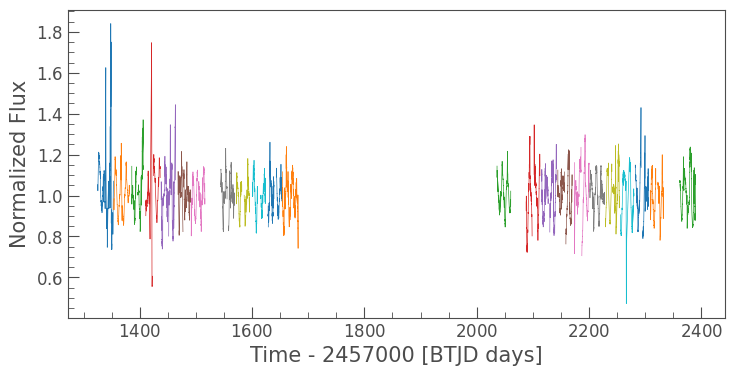

In [20]:
ax = lc_cep.plot(normalize=True);
ax.get_legend().remove()
plt.show()

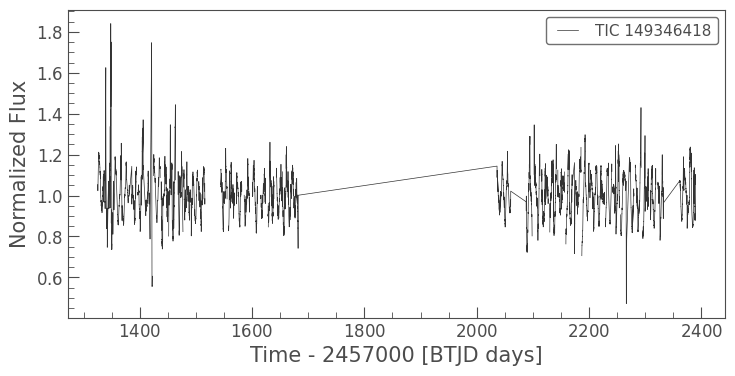

In [21]:
lc_cep_stitched = lc_cep.stitch()
lc_cep_stitched.plot();

(0.0, 1.0)

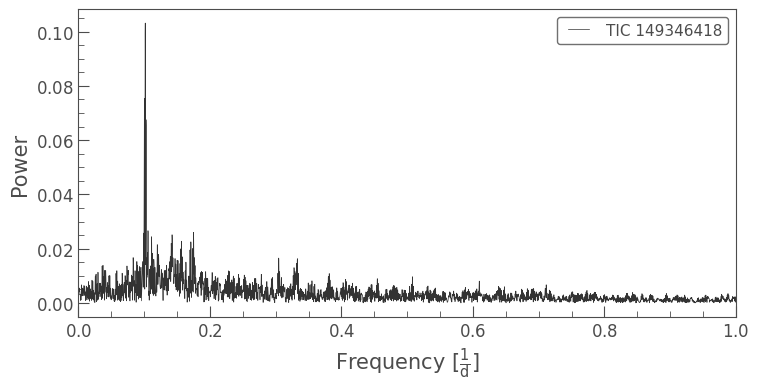

In [22]:
pg_cep = lc_cep_stitched.to_periodogram()
ax = pg_cep.plot();
ax.set_xlim(0,1)

In [23]:
# OX Aur, a delta scuti from Barac
scuti = lk.search_lightcurve('OX Aur', mission='TESS')
scuti

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 20,2019,SPOC,120,21291018,0.0
1,TESS Sector 20,2019,TESS-SPOC,1800,21291018,0.0
2,TESS Sector 20,2019,QLP,1800,21291018,0.0


In [24]:
lc_scuti = scuti[0].download()
# lc_scuti

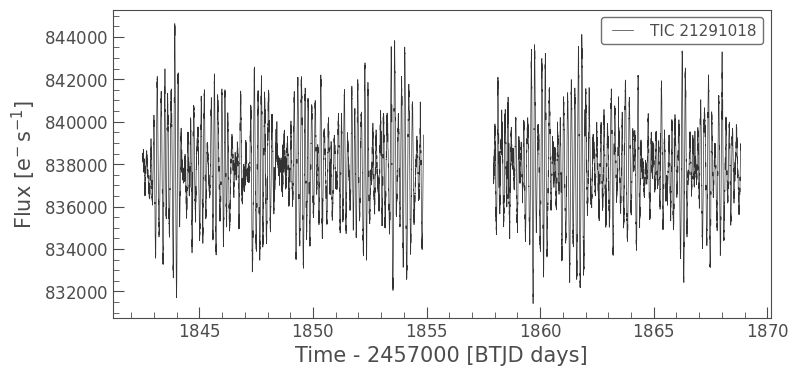

In [45]:
ax = lc_scuti.plot(normalize=False);
# ax.get_legend().remove()
plt.show()

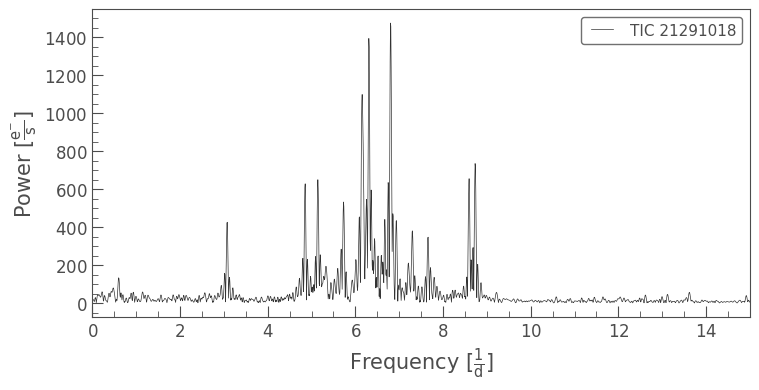

In [30]:
pg_scuti = lc_scuti.to_periodogram()
pg_scuti.plot();
plt.xlim(-0,15)
plt.show()

# Some Stuff from Slack

Check in on this again later

In [ ]:
def smoothWrapper(x, y, windowSize, windowType, samplingInterval=None):
    '''
    Wrapping a sliding-average smooth function.

    Input:
    x: the independent variable of the time series.
    y: the dependent variable of the time series.
    windowSize: the period/width of the sliding window.
    windowType: flat/hanning/hamming/bartlett/blackman/gaussian
    samplingInterval: the time between adjacent sampling points.

    Output:
    yf: the smoothed time series with the exact same points as x.

    '''

    if len(x) != len(y): 
        raise ValueError("x and y must have equal size.")
        
    if samplingInterval is None: samplingInterval = np.median(x[1:-1] - x[0:-2])

    xp = np.arange(np.min(x),np.max(x),samplingInterval)
    yp = np.interp(xp, x, y)
    window_len = int(windowSize/samplingInterval)
    if window_len % 2 == 0:
        window_len = window_len + 1
    ys = smooth(yp, window_len, window = windowType)
    yf = np.interp(x, xp, ys)

    return yf


def smooth(x, window_len = 11, window = "hanning"):
    # stole from https://scipy.github.io/old-wiki/pages/Cookbook/SignalSmooth
    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")
    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")
    if window_len < 3:
        return x
    if not window in ["flat", "hanning", "hamming", "bartlett", "blackman", "gaussian"]:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")

    s = x #np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    if window == "flat":
        w = np.ones(window_len,"d")
    elif window == "gaussian":
        w = gaussian(np.arange(-window_len*3, window_len*3,1), 
                    0, window_len, 1./(np.sqrt(2*np.pi)*window_len))
    else:
        w = eval("np."+window+"(window_len)") 
    
    y = np.convolve(w/w.sum(),s,mode="same")
    return y

# Echelle Tutorial

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

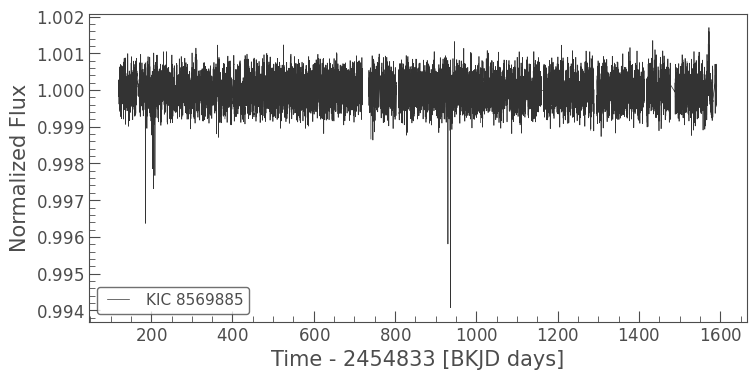

In [15]:
# lc_echelle = lk.search_lightcurve('KIC 11615890').download_all().stitch()
lc_echelle = lk.search_lightcurve('KIC 8569885').download_all().stitch()
lc_echelle.plot()

<AxesSubplot:xlabel='Frequency [$\\mathrm{\\mu Hz}$]', ylabel='Power [$\\mathrm{\\frac{1}{\\mu Hz}}$]'>

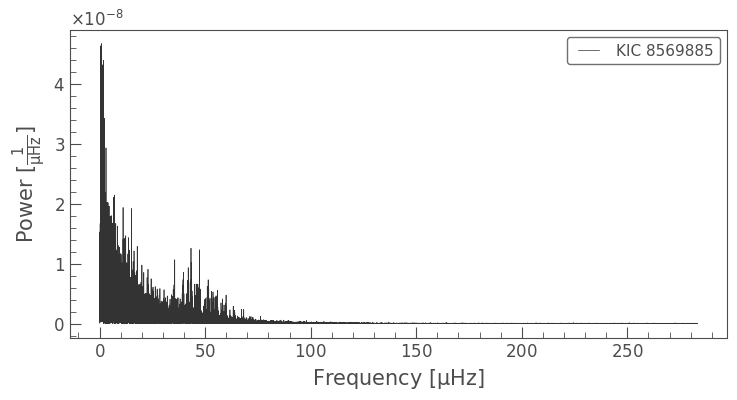

In [20]:
pg = lc_echelle.to_periodogram(normalization='psd')
pg.plot()

In [ ]:
import echelle

In [62]:
echelle.interact_echelle(pg.frequency.value, pg.power.value, 3, 6, step=0.1, 
                         fmin=10, fmax=60, scale='sqrt', backend='bokeh',smooth=True)



In [61]:
0.2485+2.1*(0.0264)

0.30394

<AxesSubplot:xlabel='Frequency mod 4.1', ylabel='Frequency'>

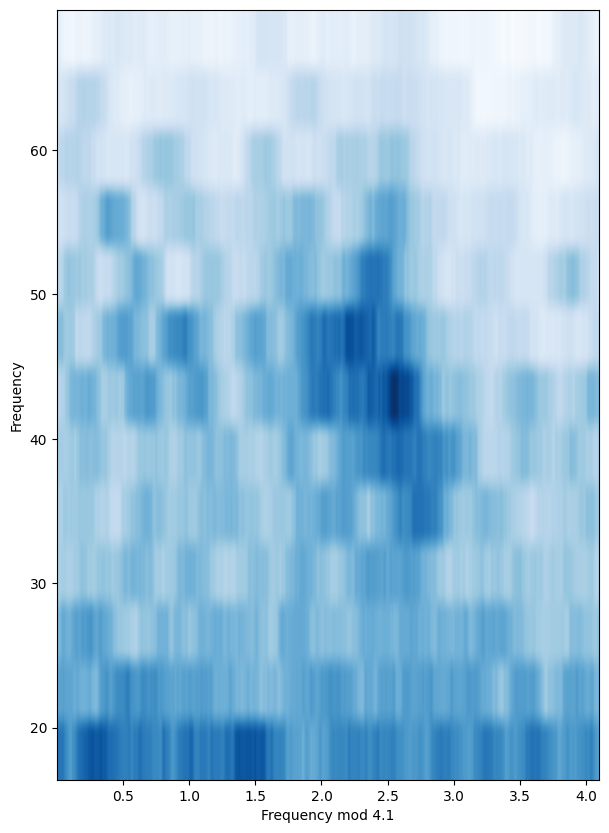

In [67]:
fig, ax = plt.subplots(figsize=[7,10])
echelle.plot_echelle(pg.frequency.value, pg.power.value, 4.10, scale='sqrt', smooth=True, ax=ax,
                    fmin=20,fmax=70,smooth_filter_width=30)

In [27]:
echelle.plot_echelle?